In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import symbols, diff, lambdify,sympify
from tqdm import tqdm
import pandas as pd

!["a"](17.4.png)

## A)

In [61]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
XY: x*y values
Y^2: Squre of y values
X^2: Squre of x values
"""

#setup initial data dictionary 
data = {"X":[6,7,11,15,17,21,23,29,29,37,39],"Y":[29,21,29,14,21,15,7,7,13,0,3]}

#turn then to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
XY = np.multiply(X,Y)
X2 = np.multiply(X,X)
Y2 = np.multiply(Y,Y)

#add the calculated columns to df
df["XY"]= XY
df["X^2"]=X2
df["Y^2"]=Y2



In [62]:
#function to calculate STD 
def std_calc(x,y):
    return (y-a0-(a1*x))**2

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "XY":[df["XY"].sum()],
                     "X^2":[df["X^2"].sum()],
                     "Y^2":[df["Y^2"].sum()]
                    })

#get n and calculate a1,a0 using the formulas
n=df.shape[0]
a1 = (n*Sums["XY"]-Sums["Y"]*Sums["X"])/(n*Sums["X^2"]-Sums["X"]**2)
a0 = (Sums["Y"]-a1*Sums["X"])/(n)

#calculate squared error for y (SE_y)
df["SE_y"] = df["Y"].apply(lambda y: (y-df["Y"].mean())**2)
df["std_div"] = df.apply(lambda d: std_calc(d['X'], d['Y']), axis=1)

#calculate f(x) evaluation for every x point for ploting
df['f'] = df['X'].apply(lambda x: a1*x+a0)

#calculation of measurements
St  = df["SE_y"].sum()
Sr  = df["std_div"].sum()
Syx = np.sqrt(Sr/(n-2))
r   = np.sqrt((St-Sr)/St)

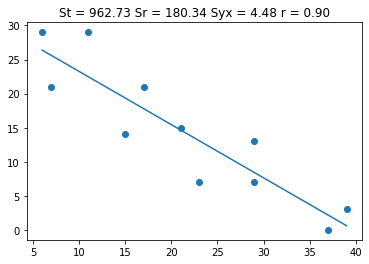

In [63]:
# (x,y) scatter plot
plt.scatter(df["X"],df["Y"])
# regression line plotting
plt.plot(df["X"],df["f"])
# title with measurements, the ";" supresses unwanted output
plt.title(f"St = {St:0.2f} Sr = {Sr:0.2f} Syx = {Syx:0.2f} r = {r:0.2f}");


## B)

Taking the measured values $x=10$ and $y=10$ we see that when x is subbed in $ y = a1x+a0$ that we get $y=23.253$.

Taking the absolute value difference between $y_{calculated}$ and $y_{measured}$ we get $|\Delta_y| =13.253$.

$|\Delta_y|$ is greater that the Standard deviation, which we got to be $S_{x/y}=4.48$, by approximately 2.9x **Therefore the measurement is likely to be wrong**.

!["a"](17.9.png)

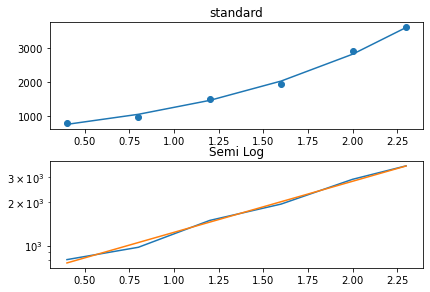

In [78]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
Z: natural log of y values
XZ: x*z values
X2: Squre of x values
"""

#setup initial data dictionary 
data = {"X":[0.4,0.8,1.2,1.6,2,2.3],"Y":[800,975,1500,1950,2900,3600]}

#turn then to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
df["Z"]= np.log(Y)
df["XZ"] = np.multiply(X,df["Z"])
df["X2"] = np.multiply(X,X)

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "Z":[df["Z"].sum()],
                     "XZ":[df["XZ"].sum()],
                     "X2":[df["X2"].sum()]
                    })

#calcualte linear constants
n=df.shape[0]
a1 = (n*Sums["XZ"]-Sums["Z"]*Sums["X"])/(n*Sums["X2"]-Sums["X"]**2)
a0 = (Sums["Z"]-a1*Sums["X"])/(n)

#find the exponential constants
alph0 = np.exp(a0)
alph1 = a1

#calculate f(x) evaluation for every x point for ploting
df['f'] = df['X'].apply(lambda x :alph0 *np.exp(x*alph1))

# init 2 plots
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout()
# (x,y) scatter plot
ax1.scatter(df["X"],df["Y"])
ax2.semilogy(df["X"],df["Y"])
ax1.title.set_text("standard")

# regression line plotting
ax1.plot(df["X"],df["f"])
ax2.semilogy(df["X"],df["f"]);
ax2.title.set_text("Semi Log")

!["a"](17.14.png)

#### Take square root of both side:
$$\sqrt(y) = \frac{a+\sqrt(x)}{b\sqrt(x)}$$

#### Split the RHD fraction and simplify :
$$\frac{a+\sqrt(x)}{b\sqrt(x)} = \frac{a}{b\sqrt(x)} + \frac{\sqrt(x)}{b\sqrt(x)} = \frac{a}{b}\frac{1}{\sqrt(x)}+\frac{1}{b}$$

#### Putting all together:
$$\sqrt(y) = \frac{a}{b}\frac{1}{\sqrt(x)}+\frac{1}{b}$$

#### Taking $$\hat{y} = \sqrt(y), \hat{x} = \frac{1}{\sqrt(x)}, a_0 = \frac{1}{b}, a_1 = \frac{a}{b}$$
#### we get
$$\hat{y}=\hat{x}a_1+a_0$$

y(1.6) = 3.9390


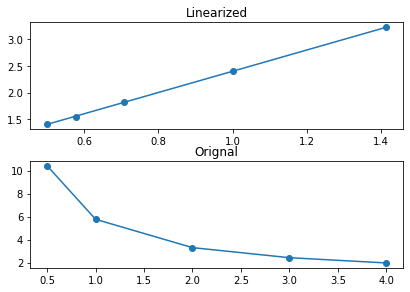

In [96]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
Z: sqrt(y) values
W: 1/sqrt(x) values
WZ: w*z values
W2: Squre of w values
"""

#setup initial data dictionary 
data = {"X":[0.5,1,2,3,4],"Y":[10.4,5.8,3.3,2.4,2]}

#turn then to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
df["Z"]  = np.sqrt(Y)
df["W"]  = df["X"].apply(lambda x: 1/np.sqrt(x))
df["WZ"] = np.multiply(df["W"],df["Z"])
df["W2"] = np.multiply(df["W"],df["W"])

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "Z":[df["Z"].sum()],
                     "W":[df["W"].sum()],
                     "WZ":[df["WZ"].sum()],
                     "W2":[df["W2"].sum()]
                    })
#calculate linear constants
n=df.shape[0]
a1 = (n*Sums["WZ"]-Sums["Z"]*Sums["W"])/(n*Sums["W2"]-Sums["W"]**2)
a0 = (Sums["Z"]-a1*Sums["W"])/(n)

#calculate f(x) evaluation for every x point for ploting
df['f'] = df['W'].apply(lambda x: a1*x+a0)

#calculate a and b
b = 1/a0
a = a1*b

#calculate f(x) evaluation for every x point for ploting
df['f2'] = df['X'].apply(lambda x: ((a+np.sqrt(x))/(b*np.sqrt(x)))**2)

# init 2 plots
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout()

# (x,y) scatter plot
ax1.scatter(df["W"],df["Z"])
# regression line plotting
ax1.plot(df["W"],df["f"])
ax1.title.set_text("Linearized")

# (x,y) scatter plot
ax2.scatter(df["X"],df["Y"])
# regression line plotting
ax2.plot(df["X"],df["f2"])
ax2.title.set_text("Orignal")

#find the predition of x = 1.6
pred = lambda x:((a+np.sqrt(x))/(b*np.sqrt(x)))**2
print(f"y(1.6) = {float(pred(1.6)):.4f}")